In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from src import visualization as vis
from datetime import datetime


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [34]:
df = pd.read_csv('files/data-hotel-clean.csv', index_col=0)

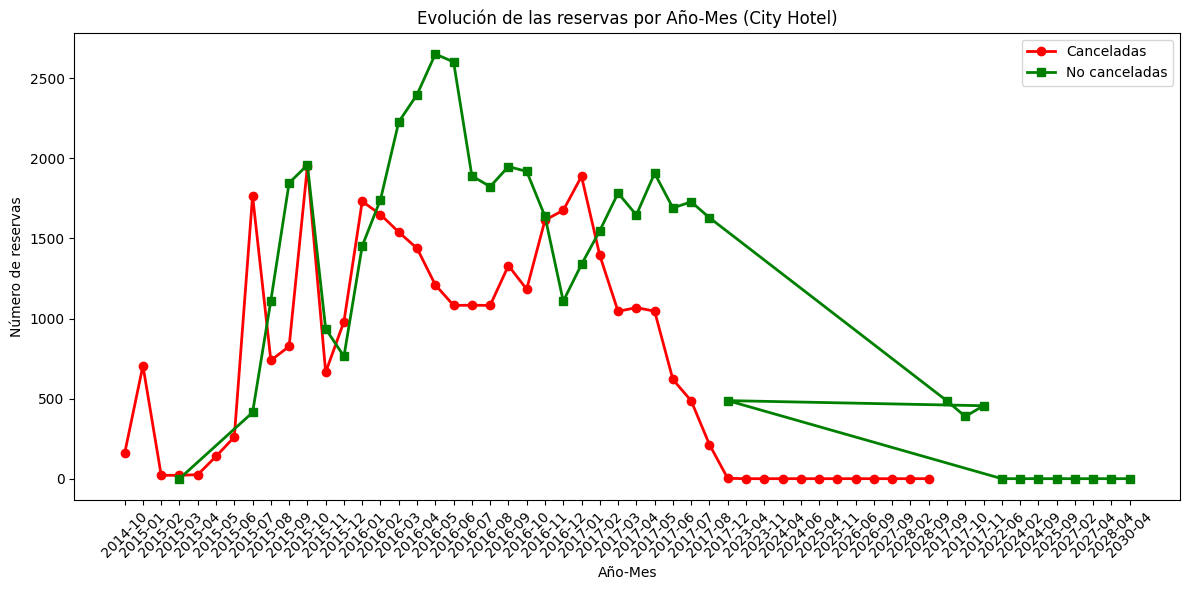

In [35]:
# Revisar que 'arrival_date' está en formato datetime
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

# Ordenar por 'arrival_date' para garantizar orden ascendente
df = df.sort_values(by='reservation_status_date', ascending=True).reset_index(drop=True)

# Crear una columna con mes y año para agrupar
df['month_year'] = df['reservation_status_date'].dt.to_period('M')

# Filtrar por 'City Hotel'
df_city = df[df['hotel'] == "City Hotel"]

# Agrupar por 'month_year' y 'is_canceled'
df_grouped = df_city.groupby(['month_year', 'is_canceled']).size().reset_index(name='count')

# Separar los datos agrupados en canceladas y no canceladas
canceladas = df_grouped[df_grouped['is_canceled'] == True]
no_canceladas = df_grouped[df_grouped['is_canceled'] == False]

# Configurar el gráfico
plt.figure(figsize=(12, 6))  # Ajuste el tamaño de la figura

# Trazar la línea para reservas canceladas
plt.plot(canceladas['month_year'].astype(str), canceladas['count'], 
          marker='o', linestyle='-', color='red', linewidth=2, label='Canceladas')

# Trazar la línea para reservas no canceladas
plt.plot(no_canceladas['month_year'].astype(str), no_canceladas['count'], 
         marker='s', linestyle='-', color='green', linewidth=2, label='No canceladas')

# Títulos y etiquetas
plt.title('Evolución de las reservas por Año-Mes (City Hotel)')
plt.xlabel('Año-Mes')
plt.ylabel('Número de reservas')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [36]:
lista_anios = ['2015-07', '2015-12', '2016-01', '2016-02', '2016-11', '2016-12', '2017-01', '2017-02']

periods_to_filter = [pd.Period('2014-07', 'M'), pd.Period('2015-11', 'M')]

periods = [pd.Period(valor , 'M') for valor in lista_anios]

# Filtra el DataFrame para obtener solo las filas donde 'month_year' esté en los periodos especificados
filtered_df = df[df['month_year'].isin(periods)]

In [37]:
filtered_df = filtered_df[filtered_df['is_canceled'] == True]

In [38]:
filtered_df = filtered_df[filtered_df['hotel'] == 'City Hotel']

In [39]:
# Revisar que 'arrival_date' está en formato datetime
filtered_df['arrival_date'] = pd.to_datetime(filtered_df['arrival_date'])

# Ordenar por 'arrival_date' para garantizar orden ascendente
filtered_df = filtered_df.sort_values(by='arrival_date', ascending=True).reset_index(drop=True)

# Crear una columna con mes y año para agrupar
filtered_df['month_year_arrival'] = filtered_df['arrival_date'].dt.to_period('M')

In [51]:
# Agrupar por 'month_year' y 'month_year_arrival' y contar las ocurrencias
grouped_df = filtered_df.groupby(['month_year', 'month_year_arrival'])['month_year_arrival'].count()/ len(filtered_df.groupby(['month_year'])['month_year_arrival'])

display(grouped_df)

month_year  month_year_arrival
2015-07     2015-04                1.375
            2015-07               44.500
            2015-08               68.750
            2015-09               58.875
            2015-10               42.250
            2015-12                3.375
            2016-04                1.625
2015-12     2015-01                4.250
            2015-02                9.375
            2015-03                7.625
            2015-04                8.875
            2015-05                5.125
            2015-06                2.875
            2015-07                2.125
            2015-08                4.875
            2015-09                0.125
            2015-10                1.000
            2015-11                0.125
            2015-12               18.625
            2016-01                6.875
            2016-02               11.000
            2016-03                8.750
            2016-04                7.750
            2016-05       